In [0]:
!pip install librosa 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import glob
import re

import librosa
import librosa.display

In [0]:
#%matplotlib inline

In [0]:
#@title
y, sr = librosa.load('02_11004_2_Ninnuvina.wav')


D = librosa.stft(y)
rp = np.max(np.abs(D))



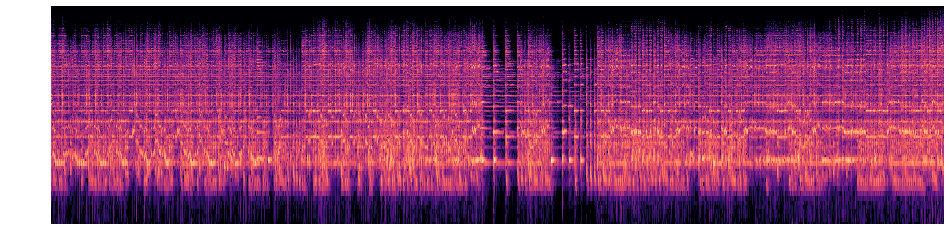

In [0]:
#@title
plt.figure(figsize=(16, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp), y_axis= 'log')
plt.axis('off')
plt.savefig('out.png', bbox_inches='tight', pad_inches=0, dpi=300)
fig = plt.figure()





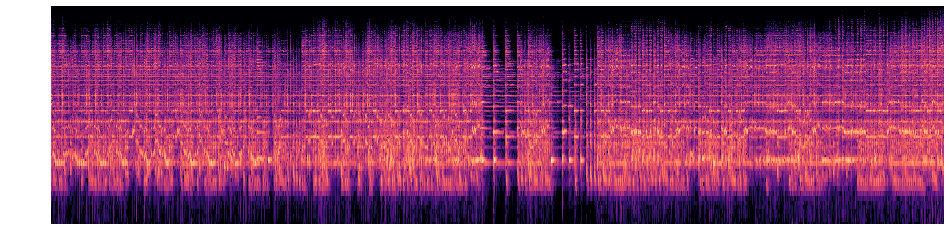

In [0]:
#@title
fig = plt.figure(figsize=(16, 4))
plt.Axes(fig, [0., 0., 1., 1.])
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp), y_axis= 'log')
plt.axis('off')

plt.savefig('out2.png', bbox_inches='tight', pad_inches=0, dpi=80)



In [0]:
%cd "/content/drive/My Drive/data/audio"

# Extract song names
songs = [re.search('.+?(?=\.wav)', x).group(0)
              for x in glob.iglob('*.wav')]

print(songs[:5])

print(len(songs))

%cd "./img"


/content/drive/My Drive/data/audio
['16_12028_2-01_Innamum', '01_11001_3_Sankari_Neeve', '09_13009_5_Om_Namonarayana', '20_11029_6-02_Raagaratna_malikache', '16_13016_3-03_Virutham_Kandar_Anubuthi_followed_by_Muruganin_Marupeyar']
118
/content/drive/My Drive/data/audio/img


In [0]:
#%%capture
fig = plt.figure(figsize=(8,2))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

def make_image(data, outputname, ref):
  librosa.display.specshow(librosa.amplitude_to_db(np.abs(data), ref=ref), y_axis= 'log')
  plt.savefig(outputname, dpi=200)
  


for i, song in enumerate(songs[:10]):
  print("Iteration 1: ", i)
  y, sr = librosa.load('../' + song + '.wav')
  #Compute the short-time Fourier transform of y
  D = librosa.stft(y)
  # Pre-compute a global reference power from the input spectrum
  rp = np.max(np.abs(D))
  # Let's compute separations for a few different margins and compare the results below
  #D_harmonic, D_percussive = librosa.decompose.hpss(D)
  
  #make_image(D_harmonic, song + '_H1.png', rp)
  #make_image(D_percussive, song + '_P1.png', rp)
  
  #D_harmonic2, D_percussive2 = librosa.decompose.hpss(D, margin=2)
  
  #make_image(D_harmonic2, song + '_H2.png', rp)
  #make_image(D_percussive2, song + '_P2.png', rp)
  
  #D_harmonic4, D_percussive4 = librosa.decompose.hpss(D, margin=4)
  
  #make_image(D_harmonic4, song + '_H4.png', rp)
  #make_image(D_percussive4, song + '_P4.png', rp)
  
  #print("Margin 4: ")
  
  D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
  
  make_image(D_harmonic8, song + '_H8.png', rp)
  make_image(D_percussive8, song + '_P8.png', rp)
  
  #D_harmonic16, D_percussive16 = librosa.decompose.hpss(D, margin=16)
  
  #make_image(D_harmonic16, song + '_H16.png', rp)
  #make_image(D_percussive16, song + '_P16.png', rp)

Iteration 1:  0
Iteration 1:  1
Iteration 1:  2
Iteration 1:  3
Iteration 1:  4
Iteration 1:  5


##Please IGNORE BELOW

In [0]:
#@title
def make_image(data, outputname, rp, size=(8, 2), dpi=100):
  fig = plt.figure(figsize=size)
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  librosa.display.specshow(librosa.amplitude_to_db(np.abs(data), ref=rp), y_axis= 'log')
  plt.savefig(outputname, dpi=dpi)
  plt.close()
  
def out_image(data, outputname, fig, dpi = 100):
  librosa.display.specshow(librosa.amplitude_to_db(np.abs(data), ref=rp), y_axis= 'log')
  plt.savefig(outputname, dpi=dpi)


for i, song in enumerate(songs):
  print("Iteration 1: ", i)
  y, sr = librosa.load('../' + song + '.wav')
  #Compute the short-time Fourier transform of y
  D = librosa.stft(y)
  # Pre-compute a global reference power from the input spectrum
  rp = np.max(np.abs(D))
  # Let's compute separations for a few different margins and compare the results below
  D_harmonic, D_percussive = librosa.decompose.hpss(D)
  
  make_image(D_harmonic, song + '_H1.png', rp, size = (8,2), dpi = 300)
  make_image(D_percussive, song + '_P1.png', rp, size = (8,2), dpi = 300)
  
  D_harmonic2, D_percussive2 = librosa.decompose.hpss(D, margin=2)
  
  make_image(D_harmonic2, song + '_H2.png', rp, size = (8,2), dpi = 300)
  make_image(D_percussive2, song + '_P2.png', rp, size = (8,2), dpi = 300)
  
  D_harmonic4, D_percussive4 = librosa.decompose.hpss(D, margin=4)
  
  make_image(D_harmonic4, song + '_H4.png', rp, size = (8,2), dpi = 300)
  make_image(D_percussive4, song + '_P4.png', rp, size = (8,2), dpi = 300)
  
  print("Margin 4: ")
  
  D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
  
  make_image(D_harmonic8, song + '_H8.png', rp, size = (8,2), dpi = 300)
  make_image(D_percussive8, song + '_P8.png', rp, size = (8,2), dpi = 300)
  
  D_harmonic16, D_percussive16 = librosa.decompose.hpss(D, margin=16)
  
  make_image(D_harmonic16, song + '_H16.png', rp, size = (8,2), dpi = 300)
  make_image(D_percussive16, song + '_P16.png', rp, size = (8,2), dpi = 300)
  
  
  
  


In [0]:
#@title
im2 = im[80:208,320:448,:]
print(im2.shape)

cv2.imwrite('./img/test.png',im2)





(80, 128, 3)


True

In [0]:
#@title
figure = plt.figure(figsize=(500, 600), dpi=1)
    axis = plt.subplot(1, 1, 1)
    plt.axis('off')
    plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off',
                    labelright='off', labelbottom='off')

     # your code goes here. e.g: I used librosa function to draw a image
    result = np.array(clip.feature_list['fft'].get_logamplitude()[0:2])
    librosa.display.specshow(result, sr=api.Clip.RATE, x_axis='time', y_axis='mel', cmap='RdBu_r')


    extent = axis.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
    plt.savefig((clip.filename + str("_.jpg")), format='jpg', bbox_inches=extent, pad_inches=0)
    plt.close()